In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Q1

In [2]:
def load_data(file_name):
    current_directory = os.getcwd()
    parent_directory = os.path.abspath(os.path.join(current_directory, '..'))
    file_path = os.path.join(parent_directory, file_name)
    dataset = pd.read_csv(file_path)
    return dataset

In [3]:
dataset = load_data('climate_change.csv')

# Q2

In [4]:
dataset.head(10)

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149
5,1983,10,0.002,340.30,1663.79,303.970,195.171,359.174,1366.0589,0.0569,0.093
6,1983,11,-0.176,341.53,1658.23,304.032,195.921,360.758,1366.1072,0.0524,0.232
7,1983,12,-0.176,343.07,1654.31,304.082,196.609,362.174,1366.0607,0.0486,0.078
8,1984,1,-0.339,344.05,1658.98,304.130,197.219,363.359,1365.4261,0.0451,0.089
9,1984,2,-0.565,344.77,1656.48,304.194,197.759,364.296,1365.6618,0.0416,0.013


# Q3

In [5]:
num_samples = dataset.shape[0]

# Q4

In [6]:
description = dataset.describe()

# Q5

In [7]:
temp_std = description['Temp']['std']

# Q6

In [8]:
MAX_col_corr = 0
MAX_col_name = []
variables = []
correlations = []
for col_name in dataset.columns:
    if col_name == "Temp":
        continue
    correlation = dataset['Temp'].corr(dataset[col_name])
    if MAX_col_corr < abs(correlation):
        MAX_col_name = []
        MAX_col_name.append((col_name,correlation))
        MAX_col_corr = abs(correlation)
    elif MAX_col_corr == abs(correlation):
            MAX_col_name.append((col_name,correlation))
    if correlation < 0:
        print(f"{col_name} is negatively correlated with Temp: {correlation}.")
    elif correlation > 0:
        print(f"{col_name} is positevly correlated with Temp: {correlation}.")
    elif correlation == 0:
        print(f"{col_name} and Temp are not correlated.")
    variables.append(col_name)
    correlations.append(correlation)
    
print('--------------------------------')
for most_corr in MAX_col_name:  
    print(f"{most_corr[0]} has the highest correlation with Temp.")
print("correlation is:", MAX_col_corr)

Year is positevly correlated with Temp: 0.7557311461415588.
Month is negatively correlated with Temp: -0.0980158208115976.
MEI is positevly correlated with Temp: 0.13529168433351063.
CO2 is positevly correlated with Temp: 0.7485046457380214.
CH4 is positevly correlated with Temp: 0.6996965803638932.
N2O is positevly correlated with Temp: 0.7432418337360969.
CFC-11 is positevly correlated with Temp: 0.3801113416532199.
CFC-12 is positevly correlated with Temp: 0.6889441088656744.
TSI is positevly correlated with Temp: 0.182185606828757.
Aerosols is negatively correlated with Temp: -0.39206944627521423.
--------------------------------
Year has the highest correlation with Temp.
correlation is: 0.7557311461415588


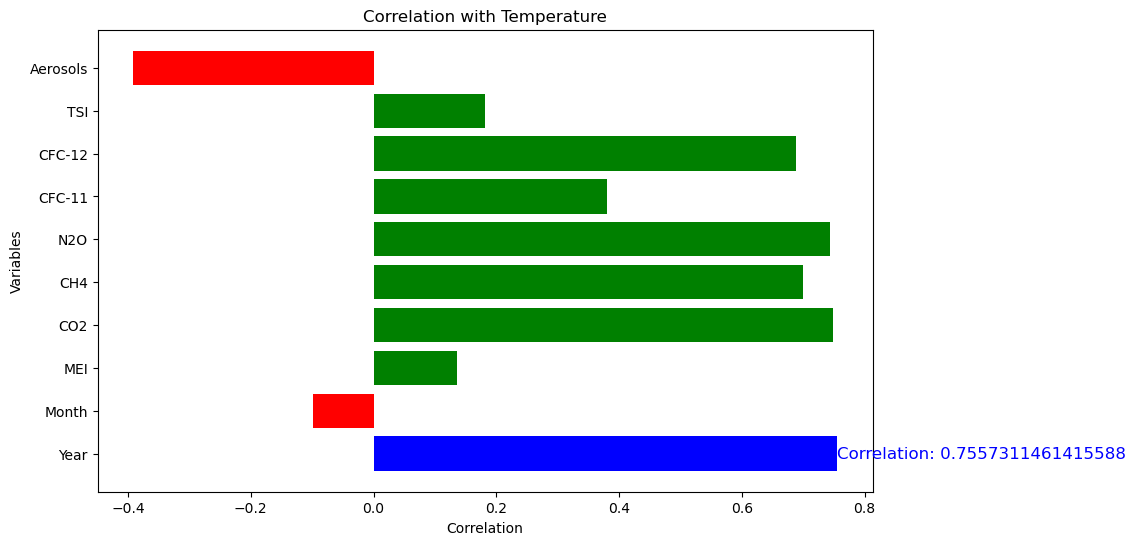

In [9]:
plt.figure(figsize=(10, 6))
plt.barh(variables, correlations, color=['green' if corr > 0 else 'red' for corr in correlations])
 
for item in MAX_col_name:
    plt.barh(item[0], item[1], color='blue')
    plt.text(item[1], item[0], f"Correlation: {MAX_col_corr}", va='center', fontsize=12, color='blue')

plt.xlabel("Correlation")
plt.ylabel("Variables")
plt.title("Correlation with Temperature")
plt.show()


# Q7

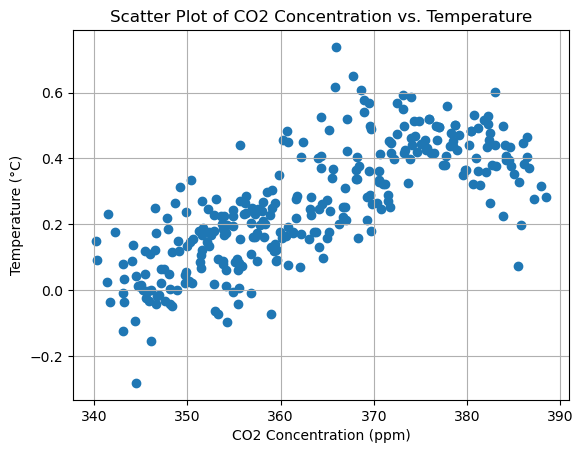

In [10]:
plt.scatter(dataset['CO2'], dataset['Temp'])
plt.xlabel('CO2 Concentration (ppm)')
plt.ylabel('Temperature (°C)')
plt.title('Scatter Plot of CO2 Concentration vs. Temperature')
plt.grid(True)
plt.show()

# Part 2-2

# Q1

In [11]:
train_data = dataset[dataset.Year<= 2003]

In [12]:
test_data = dataset[dataset.Year > 2003]

# Q2 

In [13]:
train_num = train_data.shape[0]

In [14]:
test_num = test_data.shape[0]

# Q3

In [15]:
train_data = train_data[['Temp','CO2']]

In [16]:
test_data = test_data[['Temp','CO2']]

# Q4

In [17]:
x_train, y_train = train_data.CO2.values, train_data.Temp.values

In [18]:
x_test, y_test = test_data.CO2.values, test_data.Temp.values

In [19]:
type(x_train)

numpy.ndarray

# Q5

    Mean = 0: To normalize the CO2 values so that they have a mean (average) of 0, you need to subtract the mean of the training set from each CO2 value in both the training and test sets. This centers the data around 0.

    Standard Deviation = 1: To normalize the CO2 values so that they have a standard deviation of 1, you need to divide each CO2 value by the standard deviation of the training set. This scales the data to have a standard deviation of 1.

In [20]:
co2_train_mean = round(x_train.mean(),2)

In [21]:
co2_train_std = round(x_train.std(),2)

In [22]:
normalized_train_data = [round((item - co2_train_mean) / co2_train_std,2) for item in x_train]
normalized_test_data = [round((item - co2_train_mean) / co2_train_std,2) for item in x_test]

In [23]:
normalized_train_data = np.array(normalized_train_data, dtype=np.float64)

independent variable =  features

dependent variable = labels

slope = b1

intercept = b0

# 3 Hypothesis Function

H(X) = b0 + b1*X

In [24]:
def hypothesis(b0, b1, X):
    return b0 + b1 * X

# 4 Cost Function

$$ \text{MSE} = \frac{1}{m} \sum_{i=1}^{n} ((b_0 + b_1 \cdot x_i) - y_i)^2 $$


$$ \text{MSE} = \frac{1}{m} \sum_{i=1}^{n} \left(h(x_i) - y_i\right)^2 $$


In [25]:
def cost_function(b0, b1, X, Y):
    m = len(X)
    return (1/m) * np.sum((hypothesis(b0, b1, X) - Y) ** 2)

# 5 Gradient descent

    Batch Gradient Descent: It computes the gradient on the entire dataset before making a parameter update. It can be slow for large datasets.

    Stochastic Gradient Descent (SGD): It updates the parameters for each training example, making it faster but potentially noisy in terms of convergence.

    Mini-Batch Gradient Descent: It's a compromise between batch and stochastic gradient descent. It updates the parameters using a small random batch of training examples.

b0 = b0 - (learning_rate * ∂(Cost)/∂(b0))

b1 = b1 - (learning_rate * ∂(Cost)/∂(b1))


In the gradient descent algorithm, the parameters (coefficients) of the model are updated by moving them in the direction that minimizes the cost function. The minus sign is used to ensure that the algorithm moves the parameters in the direction of decreasing the cost. Here's why it's a subtraction:

$$ \frac{d}{db_0} \text{MSE} = \frac{1}{m} \sum_{i=1}^{n} (b_0 + b_1 \cdot x_i - y_i) $$


$$ \frac{d}{db_1} \text{MSE} = \frac{1}{m} \sum_{i=1}^{n} (b_0 + b_1 \cdot x_i - y_i) \cdot x_i $$

# batch gradient descent

    If the learning rate is too large: The model might converge quickly but may overshoot the optimal solution, leading to instability or divergence. In this case, a smaller number of iterations may be needed.

    If the learning rate is too small: The model's updates are very small, and it may take a long time to converge to an optimal solution. In this case, a larger number of iterations may be needed.

In [26]:
iterations = 100
m = len(normalized_train_data)
result = []
for lr in range(1, 11):
    b0 = 0.2
    b1 = 0.2
    learning_rate = lr / 10.0
    num_iterations = int(iterations / learning_rate)
    
    for _ in range(num_iterations):
        grad_b0 = (1/m) * np.sum(hypothesis(b0, b1, normalized_train_data) - y_train)
        grad_b1 = (1/m) * np.sum((hypothesis(b0, b1, normalized_train_data) - y_train) * normalized_train_data)

        b0 -= learning_rate * grad_b0
        b1 -= learning_rate * grad_b1
    
    y_test_pred = [round(hypothesis(b0, b1, x), 3) for x in normalized_test_data]
    y_train_pred = [round(hypothesis(b0, b1, x), 3) for x in normalized_train_data]
  
    data = {'x': np.append(normalized_train_data, normalized_test_data),
       'y': np.append(y_train,y_test),
       'y_pred': np.append(y_train_pred,y_test_pred)}
    df = pd.DataFrame(data)
    df['Squared_Error'] = (df['y_pred'] - df['y']) ** 2
    mse = df['Squared_Error'].mean()
    
    result.append([b0,b1,learning_rate,num_iterations,mse])

# 6 Prediction

A lower MSE indicates a better fit of your model to the data, which is generally desirable.
A higher MSE suggests that your model's predictions have larger errors when compared to the actual values, which is less desirable.

The range for the Mean Squared Error (MSE) is theoretically from 0 to positive infinity.

In [27]:
mse

0.016052639610389607

# regression line

y = b0 + b1x

y = 0.21889312338791064 + 0.13113492782968783 x

In [28]:
regression_line = b1 * normalized_train_data + b0

# plot regression

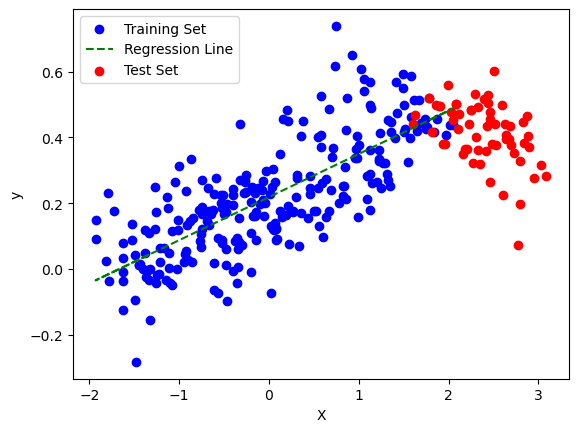

In [29]:
plt.scatter(normalized_train_data, y_train, color='blue', label='Training Set')
plt.plot(normalized_train_data, regression_line, color='green', linestyle='--', label='Regression Line')
plt.scatter(normalized_test_data, y_test, color='red', label='Test Set')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# results

In [30]:
from tabulate import tabulate

headers = ["b0", "b1", "learning rate","iteration","mse"]
print(tabulate(result, headers, tablefmt="grid", numalign="right", stralign="right"))


+----------+----------+-----------------+-------------+-----------+
|       b0 |       b1 |   learning rate |   iteration |       mse |
+==========+==========+=================+=============+===========+
| 0.218903 | 0.131141 |             0.1 |        1000 | 0.0160526 |
+----------+----------+-----------------+-------------+-----------+
| 0.218903 | 0.131141 |             0.2 |         500 | 0.0160526 |
+----------+----------+-----------------+-------------+-----------+
| 0.218903 | 0.131141 |             0.3 |         333 | 0.0160526 |
+----------+----------+-----------------+-------------+-----------+
| 0.218903 | 0.131141 |             0.4 |         250 | 0.0160526 |
+----------+----------+-----------------+-------------+-----------+
| 0.218903 | 0.131141 |             0.5 |         200 | 0.0160526 |
+----------+----------+-----------------+-------------+-----------+
| 0.218903 | 0.131141 |             0.6 |         166 | 0.0160526 |
+----------+----------+-----------------+-------

# Closed form solution